In [0]:
%tensorflow_version 2.x
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as poly
import tensorflow.keras
import tensorflow.keras.backend as k
from tensorflow.keras.preprocessing import image as i
from tensorflow.keras.models import load_model
from tensorflow.keras import optimizers, models, layers, regularizers, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from shapely.geometry import Polygon
import sys

lb_data = np.load('/content/drive/My Drive/Colab Notebooks/AP_LB_Dataset.npy')
lb_data = lb_data.astype('float32') / 255

'''data = np.load('/content/drive/My Drive/Colab Notebooks/AP_dataset_float1RGB.npz')
x_train = data['x_train']
y_train = data['y_train']
x_val = data['x_val']
y_val = data['y_val']
x_test = data['x_test']
y_test = data['y_test']'''

'''Cdata = np.load('/content/drive/My Drive/Colab Notebooks/CSlabels.npz')
c_train = Cdata['c_train']
c_val = Cdata['c_val']
c_test= Cdata['c_test']'''

In [0]:
BBCSnet1 = load_model('/content/drive/My Drive/Colab Notebooks/Models/BBCSnet1.h5')

In [0]:
def IoU(poly_true, poly_pred):
  poly1 = Polygon(poly_true)
  poly2 = Polygon(poly_pred)
  poly1 = poly1.buffer(0)
  poly2 = poly2.buffer(0)
  intersection = poly1.intersection(poly2)
  union = poly1.area + poly2.area - intersection.area
  return intersection.area / union

In [0]:
def get_polys(data_lab, data_img, img_num): # returns true poly and pred poly
  return np.reshape(data_lab[img_num], (4, 2)), np.reshape(BBnet2.predict(data_img[np.newaxis, img_num]), (4, 2))

In [0]:
def vis_img(model, num):
  img = lb_data[num]
  graph_img = img
  img = img[np.newaxis, :, :, :]
  pred, cs = model.predict(img)
  # true = y_test[num]
  # x_y_true = np.reshape(true, (4, 2))
  x_y_pred = np.reshape(pred, (4, 2))  

  fig, ax = plt.subplots(1)
  ax.imshow(graph_img)
  # true_box = poly(x_y_true, ec='black', color='g')
  pred_box = poly(x_y_pred, ec='black', color='purple' )
  # ax.add_patch(true_box)
  ax.add_patch(pred_box)
  plt.show()
  print(cs * 100)

In [0]:
def create_cs_labels():
  c_train, c_val, c_test = np.empty((0, 1)), np.empty((0, 1)), np.empty((0, 1))

  for i in range(len(x_train)):
    tp, pp = get_polys(y_train, x_train, i)
    iou = IoU(tp, pp)
    iou = np.array(iou)
    iou = iou[np.newaxis, np.newaxis]
    c_train = np.append(c_train, iou, axis=0)
    sys.stdout.write('\rCreating Training Labels: ' + str(i + 1) + '/' + str(len(x_train)))
    sys.stdout.flush()
  
  for i in range(len(x_val)):
    tp, pp = get_polys(y_val, x_val, i)
    iou = IoU(tp, pp)
    iou = np.array(iou)
    iou = iou[np.newaxis, np.newaxis]
    c_val = np.append(c_val, iou, axis=0)
    sys.stdout.write('\rCreating Validation Labels: ' + str(i + 1) + '/' + str(len(x_val)))
    sys.stdout.flush()
  
  for i in range(len(x_test)):
    tp, pp = get_polys(y_test, x_test, i)
    iou = IoU(tp, pp)
    iou = np.array(iou)
    iou = iou[np.newaxis, np.newaxis]
    c_test = np.append(c_test, iou, axis=0)
    sys.stdout.write('\rCreating Test Labels: ' + str(i + 1) + '/' + str(len(x_test)))
    sys.stdout.flush()

  print('\n')
  print(np.shape(c_train))
  print(np.shape(c_val))
  print(np.shape(c_test))
  np.savez('/content/drive/My Drive/Colab Notebooks/CSlabels.npz', c_train=c_train, c_val=c_val, c_test=c_test)

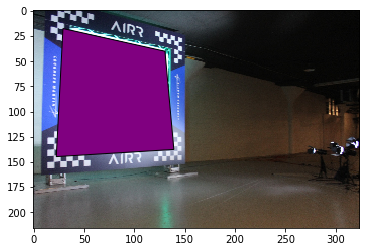

[[91.8584]]


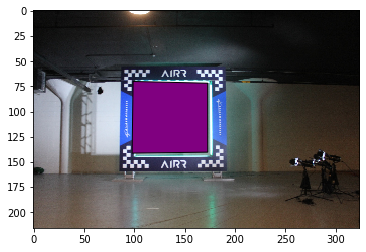

[[93.17606]]


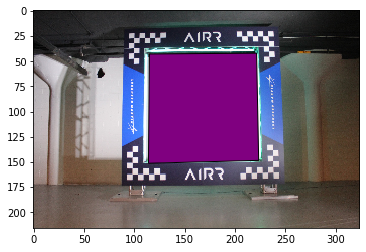

[[92.67]]


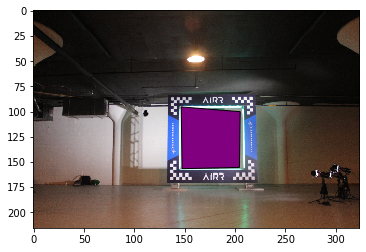

[[90.21032]]


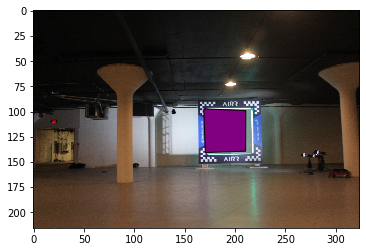

[[87.30466]]


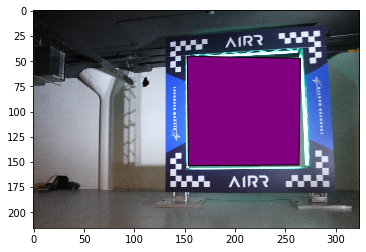

[[88.66222]]


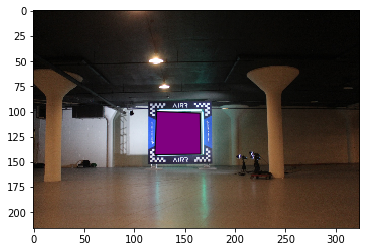

[[88.6711]]


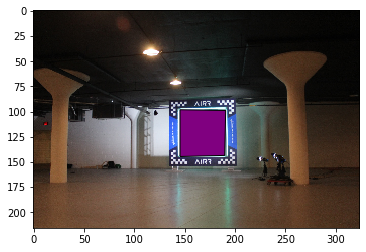

[[88.95001]]


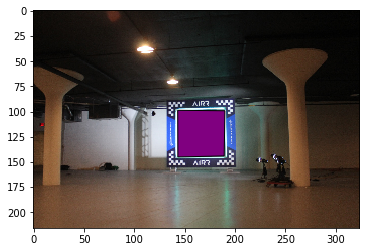

[[89.506065]]


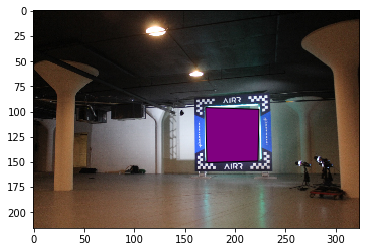

[[89.34327]]


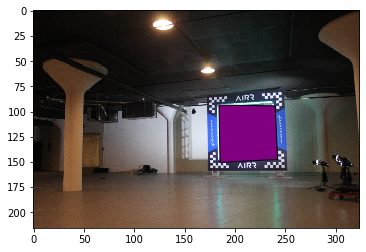

[[86.50565]]


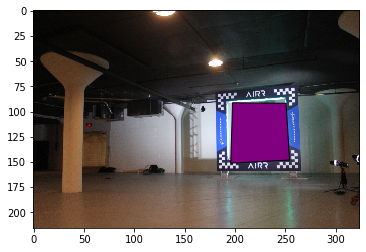

[[78.16696]]


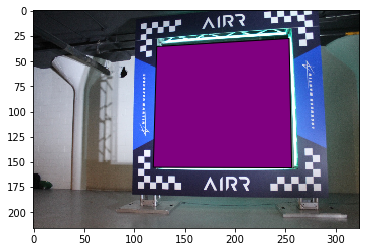

[[82.517685]]


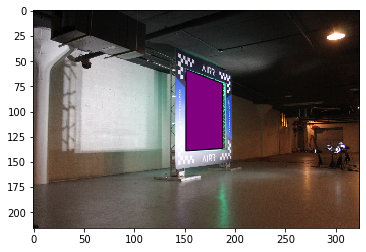

[[83.93646]]


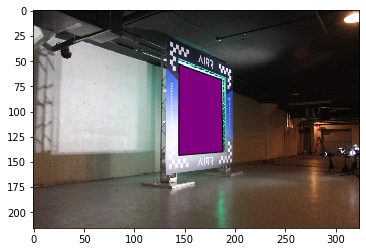

[[88.73696]]


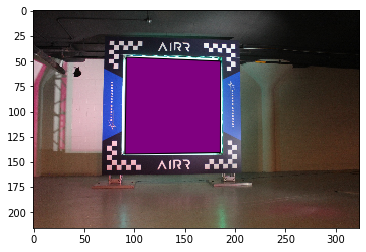

[[94.861885]]


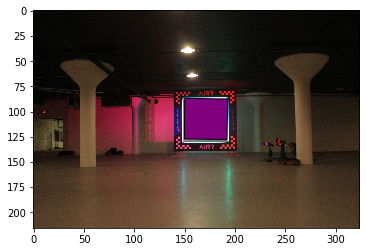

[[88.53376]]


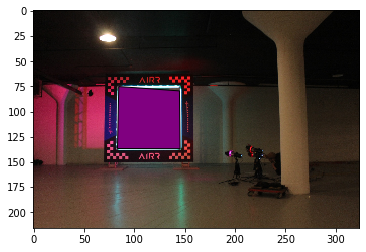

[[90.50868]]


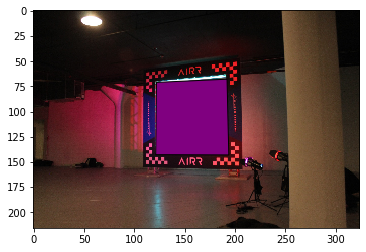

[[91.99561]]


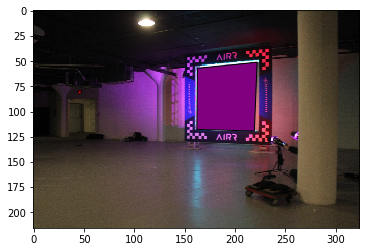

[[88.76211]]


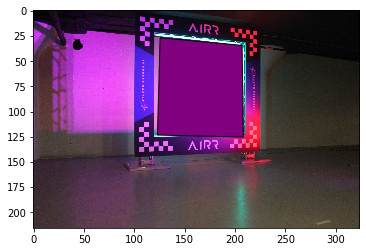

[[90.85861]]


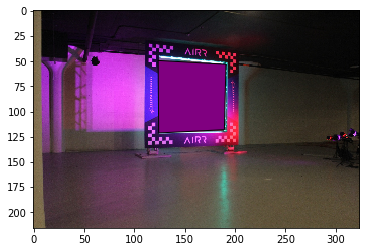

In [0]:
for i in range(500):
  vis_img(BBCSnet1, i)